# K-means

## Importation des bibliothèques

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importation de la dataset

In [ ]:
dataset = pd.read_csv('dataset_etudiant.csv')
X = dataset.iloc[:, :].values

## Le modèle KMeans (la classe)

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100):
        self.K = K
        self.max_iters = max_iters

        # liste d'indices d'échantillons pour chaque cluster
        self.clusters = [[] for _ in range(self.K)]
        # les centres (mean) pour chaque cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialisation
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimisation des clusters
        for _ in range(self.max_iters):
            # Affecter des échantillons aux centroïdes les plus proches (créer des clusters)
            self.clusters = self._create_clusters(self.centroids)

            # Calcul de nouveaux centroïdes à partir des clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # vérifier si les clusters ont changé
            if self._is_converged(centroids_old, self.centroids):
                break

        # Classer les échantillons comme l'indice de leurs clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # chaque échantillon recevra l'étiquette du cluster auquel il a été attribué
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Attribuez les échantillons aux centroïdes les plus proches pour créer des clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance de l'échantillon actuel à chaque centroïde
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # attribuer la valeur moyenne des clusters aux centroïdes
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances entre chaque ancien et nouveau centre de gravité, pour tous les centres de gravité
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

## L'entraînement du modèle K-means sur la dataset

In [ ]:
kmeans = KMeans(K=3, max_iters=150)
y_pred = kmeans.predict(X)
print(y_pred)

[0. 0. 2. 0. 2. 2. 2. 0. 2. 0. 1. 1. 2. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 1. 2. 0. 2. 0. 0. 0. 0. 1. 1. 0. 2. 0.
 1. 0.]


## Visualisation des clusters

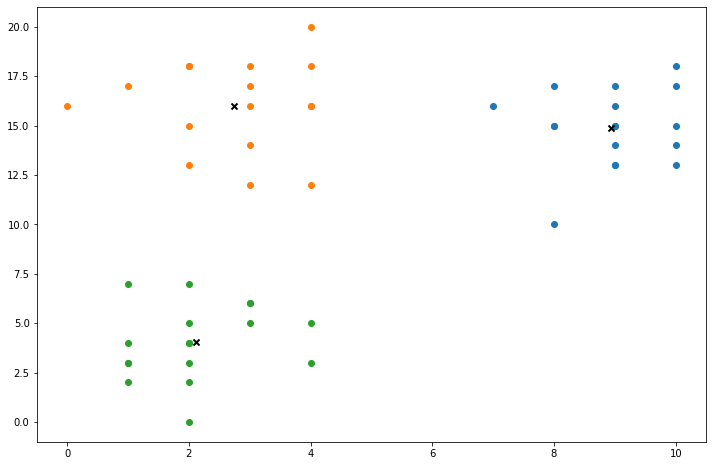

In [ ]:
kmeans.plot()